In [1]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2022-03-10 13:36:11--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2022-03-10 13:36:11 (34.2 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [2]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [3]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [4]:
!mkdir data

In [5]:
import urllib.request
def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:        
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

In [7]:
import os
import glob
import numpy as np
from tensorflow.python.keras import layers
from tensorflow import keras 
import tensorflow as tf

# print(len(os.listdir('data')))

In [8]:
def load_data(root, vfold_ratio=0.1, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [9]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

diving_board


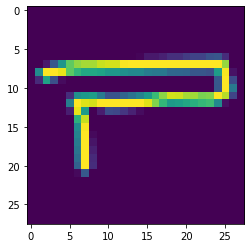

In [10]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [11]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
print(x_train.shape)

(450000, 28, 28, 1)


In [13]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
# print(model.summary())

In [14]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=15)

Epoch 1/15
1583/1583 - 38s - loss: 1.8117 - top_k_categorical_accuracy: 0.7997 - val_loss: 1.3207 - val_top_k_categorical_accuracy: 0.8843 - 38s/epoch - 24ms/step
Epoch 2/15
1583/1583 - 24s - loss: 1.1592 - top_k_categorical_accuracy: 0.9034 - val_loss: 1.0967 - val_top_k_categorical_accuracy: 0.9094 - 24s/epoch - 15ms/step
Epoch 3/15
1583/1583 - 23s - loss: 1.0091 - top_k_categorical_accuracy: 0.9191 - val_loss: 0.9957 - val_top_k_categorical_accuracy: 0.9202 - 23s/epoch - 15ms/step
Epoch 4/15
1583/1583 - 22s - loss: 0.9243 - top_k_categorical_accuracy: 0.9277 - val_loss: 0.9822 - val_top_k_categorical_accuracy: 0.9219 - 22s/epoch - 14ms/step
Epoch 5/15
1583/1583 - 22s - loss: 0.8710 - top_k_categorical_accuracy: 0.9326 - val_loss: 0.9135 - val_top_k_categorical_accuracy: 0.9277 - 22s/epoch - 14ms/step
Epoch 6/15
1583/1583 - 22s - loss: 0.8297 - top_k_categorical_accuracy: 0.9367 - val_loss: 0.8760 - val_top_k_categorical_accuracy: 0.9312 - 22s/epoch - 14ms/step
Epoch 7/15
1583/1583 -

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 93.63%


In [16]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://a6636dbc-2666-4521-b821-a4f6d60daf88/assets


INFO:tensorflow:Assets written to: ram://a6636dbc-2666-4521-b821-a4f6d60daf88/assets


In [17]:
import joblib
joblib.dump(model, 'model.pkl')

INFO:tensorflow:Assets written to: ram://c704f5c8-3a38-475a-bcdf-3949d744750c/assets


INFO:tensorflow:Assets written to: ram://c704f5c8-3a38-475a-bcdf-3949d744750c/assets


['model.pkl']

(28, 28, 1)


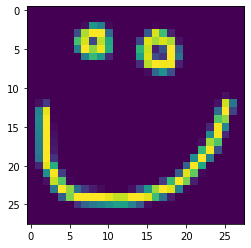

In [18]:
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
print(img.shape)
plt.imshow(img.squeeze())

In [21]:
def predict(img):
  pred = model.predict(np.expand_dims(img, axis=0))[0]
  ind = (-pred).argsort()[:5]
  latex = [class_names[x] for x in ind]
  print(latex)

In [22]:
predict(img)

['smiley_face', 'face', 'moustache', 'beard', 'tooth']


In [23]:
import joblib
joblib.dump(model, 'model.pkl')

INFO:tensorflow:Assets written to: ram://d5b7e7ce-09ed-4119-b3f6-660fdfa12f14/assets


INFO:tensorflow:Assets written to: ram://d5b7e7ce-09ed-4119-b3f6-660fdfa12f14/assets


['model.pkl']

In [24]:
list1=[]
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        list1.append(item)
        file_handler.write("{}\n".format(item))


In [25]:
print(list1)

['line', 'candle', 'basketball', 'smiley_face', 'hammer', 'cat', 'shorts', 'screwdriver', 'grapes', 'frying_pan', 'mountain', 'eyeglasses', 'square', 'power_outlet', 'table', 'cell_phone', 'diving_board', 'spider', 'traffic_light', 'ice_cream', 'mushroom', 'flower', 'moustache', 'baseball_bat', 'snake', 'fan', 'ladder', 'alarm_clock', 'rainbow', 'cup', 'shovel', 'dumbbell', 'ceiling_fan', 'pants', 'hat', 'tooth', 'radio', 'cookie', 'lollipop', 'bridge', 'sword', 'bread', 't-shirt', 'car', 'pizza', 'lightning', 'bird', 'tent', 'scissors', 'sock', 'baseball', 'rifle', 'book', 'bed', 'bicycle', 'eye', 'door', 'tree', 'star', 'circle', 'cloud', 'microphone', 'saw', 'helmet', 'light_bulb', 'pencil', 'chair', 'headphones', 'airplane', 'clock', 'face', 'paper_clip', 'syringe', 'drums', 'broom', 'camera', 'umbrella', 'axe', 'beard', 'hot_dog', 'stop_sign', 'triangle', 'bench', 'tennis_racquet', 'sun', 'butterfly', 'coffee_cup', 'apple', 'donut', 'wristwatch', 'suitcase', 'knife', 'pillow', 'an

In [26]:
np.save('model.npy',model)

INFO:tensorflow:Assets written to: ram://d42c64a0-4e8b-434e-a64e-9d374f0c8f3d/assets


INFO:tensorflow:Assets written to: ram://d42c64a0-4e8b-434e-a64e-9d374f0c8f3d/assets


In [ ]:
model.save('model.h5')

In [28]:
print(list1)

['line', 'candle', 'basketball', 'smiley_face', 'hammer', 'cat', 'shorts', 'screwdriver', 'grapes', 'frying_pan', 'mountain', 'eyeglasses', 'square', 'power_outlet', 'table', 'cell_phone', 'diving_board', 'spider', 'traffic_light', 'ice_cream', 'mushroom', 'flower', 'moustache', 'baseball_bat', 'snake', 'fan', 'ladder', 'alarm_clock', 'rainbow', 'cup', 'shovel', 'dumbbell', 'ceiling_fan', 'pants', 'hat', 'tooth', 'radio', 'cookie', 'lollipop', 'bridge', 'sword', 'bread', 't-shirt', 'car', 'pizza', 'lightning', 'bird', 'tent', 'scissors', 'sock', 'baseball', 'rifle', 'book', 'bed', 'bicycle', 'eye', 'door', 'tree', 'star', 'circle', 'cloud', 'microphone', 'saw', 'helmet', 'light_bulb', 'pencil', 'chair', 'headphones', 'airplane', 'clock', 'face', 'paper_clip', 'syringe', 'drums', 'broom', 'camera', 'umbrella', 'axe', 'beard', 'hot_dog', 'stop_sign', 'triangle', 'bench', 'tennis_racquet', 'sun', 'butterfly', 'coffee_cup', 'apple', 'donut', 'wristwatch', 'suitcase', 'knife', 'pillow', 'an

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model=load_model('/content/keras.h5')

OSError: ignored

In [31]:
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://707eea19-8c94-4631-95dc-e14eb1bf9aeb/assets


INFO:tensorflow:Assets written to: ram://707eea19-8c94-4631-95dc-e14eb1bf9aeb/assets


In [32]:
from skimage.transform import resize

In [33]:
from PIL import Image,ImageOps

In [ ]:
import cv2
  
image=Image.open('/content/candle - Copy.JPG')
image=ImageOps.grayscale(image)
image=resize(np.array(image),(28,28))
image=np.array(image)
im = np.where(image == 255, 0, image)
im = np.where(im != 0, 255-im, im)
x=image
print(x.shape)
plt.imshow(x.squeeze())
x= x.reshape(image_size, image_size, 1).astype('float32')

In [ ]:
x= x.reshape(1, image_size, image_size, 1).astype('float32')
pred = model.predict(x)[0]
ind = (-pred).argsort()[:5]
latex = [class_names[i] for i in ind]
print(latex)

In [ ]:
shapes = ['hexagon','octagon','circle','line','lightning']

In [ ]:
x=x_train[0]*255
neededformat=x%255

In [ ]:
neededformat

In [ ]:
def cropimage(im):
  im=ImageOps.grayscale(im)
  im=np.array(im)
  im = np.where(im == 255, 0, im)
  im = np.where(im != 0, 255-im, im)
  # printarray2d(im)
  imagedim=[]
  start=[]
  maxwidth=0
  startrow=-1
  endrow=-1
  for i in range(im.shape[0]):
    listrow=[]
    for j in range(im.shape[1]):
      if im[i][j]!=0:
        listrow=im[i,j:].tolist()
        start.append(j)
        break
    for k in range(len(listrow)-1,0,-1):
      if listrow[k]!=0:
        listrow=listrow[:k+1]
        if len(listrow)!=0:
          if start[-1]+len(listrow)>maxwidth:
            maxwidth=start[-1]+len(listrow)
          if len(imagedim)==0:
            startrow=i
          endrow=i
          imagedim.append(listrow)
        break
  imgdimarr=np.array(imagedim)
  min_start=np.min(start)
  imgcrop=im[startrow-50:endrow+50,min_start-50:maxwidth+50]
  return imgcrop

In [ ]:
def predictimage(im):
  imgcrop=cropimage(im)
  imgcropped=resize(imgcrop,(28,28))
  x=imgcropped
  x= x.reshape(image_size, image_size, 1).astype('float32')
  x=x*3
  pred = model.predict(np.expand_dims(x, axis=0))[0]
  ind = (-pred).argsort()[:5]
  latex = [class_names[i] for i in ind]
  print(latex)

In [ ]:
im=Image.open('/content/icecream.JPG')
predictimage(im)

In [ ]:
def printarray2d(x):
  for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
      print(np.round(x[1][j],3),end=" ")
    print()

In [ ]:
def printarray(x):
  for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
      print(np.round(x[i][j][0],3),end=" ")
    print()

In [ ]:
printarray(img)

In [ ]:
printarray(x)

In [ ]:
predict(x)

In [ ]:
np.max(x)

In [ ]:
printarray(np.array(im))

In [ ]:
# !pip install opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image,ImageOps

In [ ]:
def inputpreprocessing():
  img = "/content/stopsign.JPG"

  img = Image.open(img)
  # img=np.array(img)
  if img.mode == "CMYK":
      # color profiles can be found at C:\Program Files (x86)\Common Files\Adobe\Color\Profiles\Recommended
      img = ImageCms.profileToProfile(img, "USWebCoatedSWOP.icc", "sRGB_Color_Space_Profile.icm", outputMode="RGB")
  # PIL image -> OpenCV image; see https://stackoverflow.com/q/14134892/2202732
  img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

  ## (1) Convert to gray, and threshold
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

  ## (2) Morph-op to remove noise
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
  morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

  ## (3) Find the max-area contour
  cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
  cnt = sorted(cnts, key=cv2.contourArea)[-1]

  ## (4) Crop and save it
  x,y,w,h = cv2.boundingRect(cnt)
  dst = img[y:y+h, x:x+w]

  # add border/padding around the cropped image
  # dst = cv2.copyMakeBorder(dst, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255,255,255])

  # cv2.imshow("image", dst)
  # plt.imshow(dst)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  # create/write to file
  # cv2.imwrite("001.png", dst)
  WHITE = [255,255,255]
  im= cv2.copyMakeBorder(dst.copy(),50,50,50,50,cv2.BORDER_CONSTANT,value=WHITE)
  img=np.array(im)
  img = np.where(img == 255, 0, img)
  im = np.where(img != 0, 255-img, img)
  # im=Image.fromarray(img)
  im=Image.fromarray(im)
  im=ImageOps.grayscale(im)
  im=np.array(im)
  im=resize(im,(28,28))
  # plt.imshow(im)
  x=im
  image_size=28
  x.shape
  x = x.reshape(image_size, image_size, 1).astype('float32')
  x = x*3
  # print(x)
  pred = model.predict(np.expand_dims(x, axis=0))[0]
  ind = (-pred).argsort()[:5]
  latex = [gamecat[i] for i in ind]
  print(latex)

In [ ]:
inputpreprocessing()

In [ ]:
WHITE = [255,255,255]
constant= cv2.copyMakeBorder(dst.copy(),50,50,50,50,cv2.BORDER_CONSTANT,value=BLUE)

In [ ]:
img=numpy.array(constant)
img = np.where(img == 255, 0, img)
im = np.where(img != 0, 255-img, img)
# im=Image.fromarray(img)

In [ ]:
im=Image.fromarray(im)
im=ImageOps.grayscale(im)
im=np.array(im)

In [ ]:
im=resize(im,(28,28))
plt.imshow(im)

In [ ]:
x=im
image_size=28
x.shape

In [ ]:
x = x.reshape(image_size, image_size, 1).astype('float32')
x = x*3
print(x)
pred = model.predict(numpy.expand_dims(x, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [gamecat[i] for i in ind]
print(latex)

In [ ]:
gamecat = ['spider', 'bed', 'sock', 'frying_pan', 'grapes', 'basketball', 'axe', 'wristwatch', 'bread', 'anvil',
           'mountain', 'rifle', 'rainbow', 'stop_sign', 'power_outlet', 'alarm_clock',
           'drums', 'lollipop', 'cookie', 'knife', 'scissors', 'flower', 'pencil', 'apple', 'car', 'tent', 'cat', 'beard',
           'umbrella', 'butterfly', 'radio', 'shovel', 'sun', 'syringe', 'bird', 'sword', 'book', 'face', 'baseball', 'laptop', 'hammer',
           'ice_cream', 'spoon', 'tree', 'microphone', 'bridge', 'traffic_light', 'star', 'diving_board', 'shorts',
           'chair', 'eyeglasses', 'fan', 'tooth', 'cell_phone', 'headphones', 'saw', 'pillow', 'cup', 'square', 'circle',
           'light_bulb', 'paper_clip', 'screwdriver', 'tennis_racquet', 'coffee_cup', 'envelope', 'hat', 'hot_dog', 'ceiling_fan',
           'suitcase', 'bench', 'moon', 'wheel', 'cloud', 'eye', 'line', 'pants', 'airplane', 'smiley_face', 'camera', 'moustache',
           'pizza', 'triangle', 'broom', 'key', 'bicycle', 'snake', 'donut', 'clock', 'dumbbell', 'candle', 'ladder', 't-shirt', 'mushroom',
           'helmet', 'baseball_bat', 'lightning', 'table', 'door']
